In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import *
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from datetime import *

In [2]:
df = pd.read_csv("ETH_1H.csv")
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [3]:
df.dtypes

Unix Timestamp      int64
Date               object
Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
dtype: object

In [4]:
df["Symbol"].unique()

array(['ETHUSD'], dtype=object)

In [5]:
df_1 = df.drop(columns=["Symbol"])

In [6]:
df_1.isna().sum()

Unix Timestamp    0
Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [7]:
df_1.duplicated().sum()

0

In [8]:
df_1.head()

,Unix Timestamp,Date,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622


In [9]:
df_2 = df_1.copy()
df_2["Unix Timestamp"] = pd.to_datetime(df_1["Date"])
df_2.drop(columns=["Unix Timestamp"],inplace=True)
df_2.set_index(keys="Date",inplace=True)
df_2.sort_index(axis=0,inplace=True)
df_2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213


In [10]:
len(df_2)

34497

In [11]:
df_3 = df_2.reset_index()
df_3["Date"] = pd.to_datetime(df_3["Date"])
df_3["Date"] = df_3["Date"].dt.date
p = df_3.groupby(by="Date")

avg_opening_price = p["Open"].mean()
highest_high_price = p["High"].max()
lowest_low_price = p["Low"].min()
avg_closing_price = p["Close"].mean()
avg_volume = p["Volume"].mean()

df_4 = pd.DataFrame(columns = df_2.columns,index=p.groups.keys())

df_4["Open"] = avg_opening_price
df_4["High"] = highest_high_price
df_4["Low"] = lowest_low_price
df_4["Close"] = avg_closing_price
df_4["Volume"] = avg_volume

df_4 = df_4.round(2)

df_4.head()

,Open,High,Low,Close,Volume
2016-05-09,8.86,12.00,0.00,9.71,122.08
2016-05-10,9.58,9.96,9.36,9.59,26.96
2016-05-11,9.90,10.47,9.68,9.93,127.19
2016-05-12,10.51,12.00,9.92,10.50,86.36
2016-05-13,10.70,11.59,10.20,10.73,76.56


In [12]:
names_of_plots = ["Daily Opening Price","Daily Highest Price","Daily Lowest Price","Daily Closing Price","Daily Volume"]

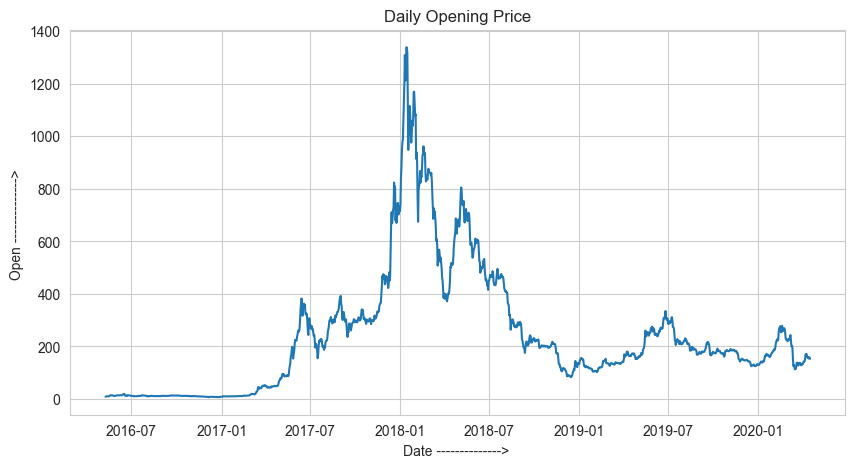

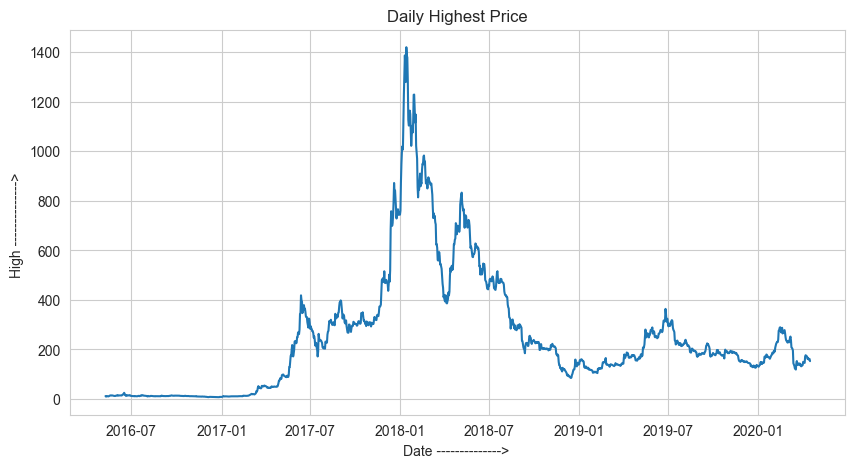

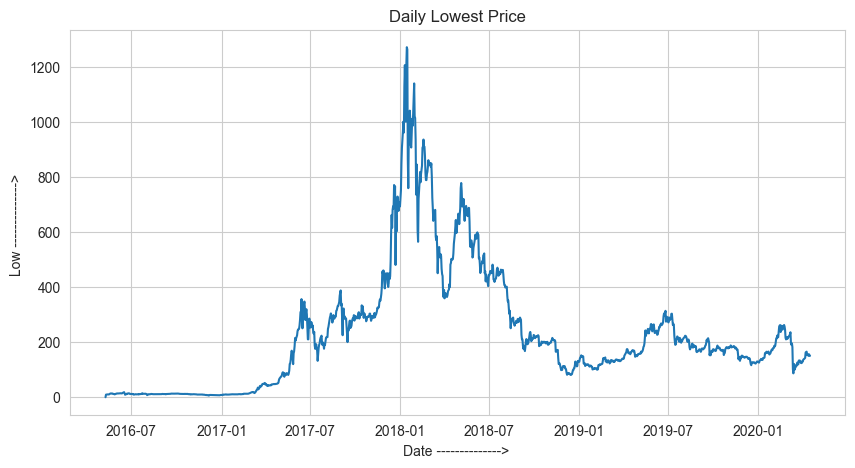

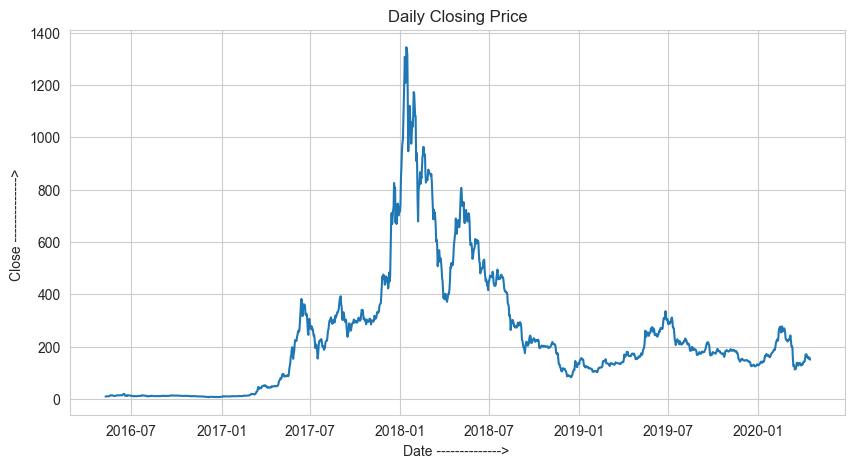

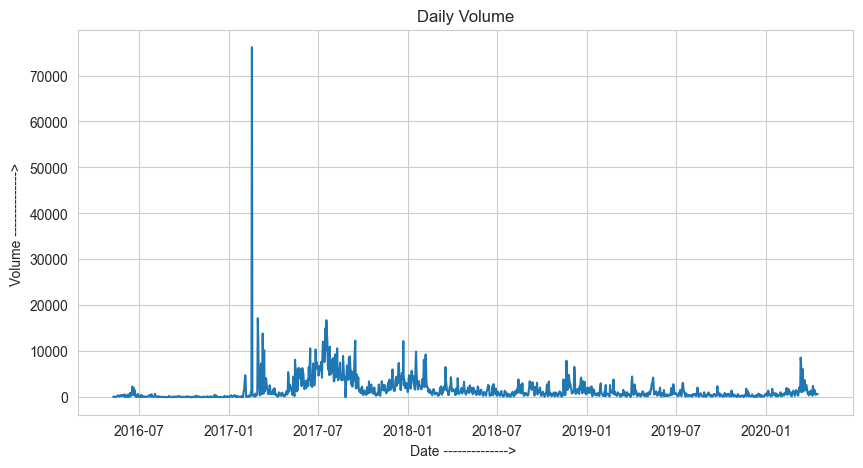

In [13]:
ctr = 0
for i in df_4:
    fig,ax = plt.subplots(figsize=(10,5))
    sns.lineplot(ax=ax,data=df_4[i])
    ax.set(title=names_of_plots[ctr],xlabel="Date --------------> ",ylabel=i+" --------------> ")
    ctr += 1
    plt.show()

In [14]:
df_2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213


In [18]:
df_5 = df_2.reset_index()
df_5["Date"] = pd.to_datetime(df_5["Date"])
df_5["hour"] = df_5["Date"].dt.hour
df_5["day"] = df_5["Date"].dt.day
df_5["month"] = df_5["Date"].dt.month
df_5["year"] = df_5["Date"].dt.year
df_5["dayofweek"] = df_5["Date"].dt.dayofweek
df_5["dayofyear"] = df_5["Date"].dt.dayofyear
df_5["weekofyear"] = list(map(lambda x: x.weekofyear,df_5["Date"]))
df_5.head()

,Date,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
0,2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
1,2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2,2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
3,2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
4,2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19


<Axes: >

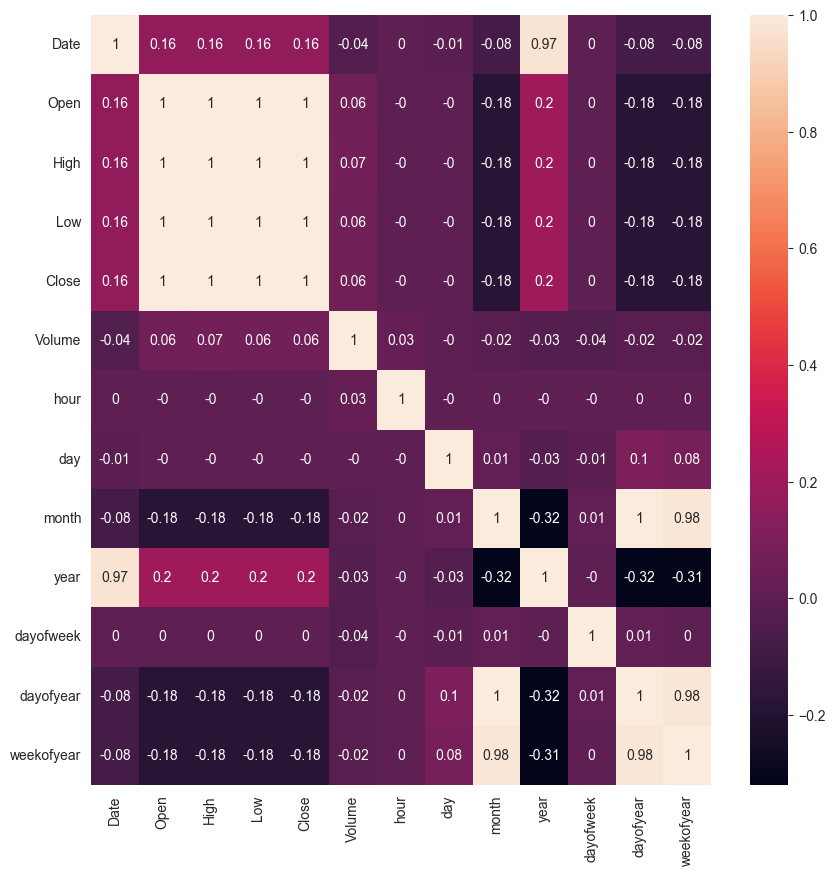

In [22]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_5.corr().round(2), annot=True)

In [33]:
columns_to_remove = ["Open","High","Low","hour","dayofweek","dayofyear","weekofyear"]
df_6 = df_5.drop(columns=columns_to_remove)
df_6.set_index(keys="Date",inplace=True)
df_6.head()

,Close,Volume,day,month,year
Date,,,,,
2016-05-09 13:00:00,9.55,432.562115,9,5,2016
2016-05-09 14:00:00,10.00,235.774075,9,5,2016
2016-05-09 15:00:00,9.99,10.973567,9,5,2016
2016-05-09 16:00:00,9.83,62.379450,9,5,2016
2016-05-09 17:00:00,9.49,329.553213,9,5,2016


In [38]:
close = df_6.iloc[:,0]
windows = []
target = []
length = 240
for i in range(len(close)-length):
    x = close.iloc[i:i+length]
    y = close.iloc[i+length]
    windows.append(x)
    target.append(y)

In [40]:
len(close)-length

34257

In [39]:
windows

[Date
 2016-05-09 13:00:00     9.55
 2016-05-09 14:00:00    10.00
 2016-05-09 15:00:00     9.99
 2016-05-09 16:00:00     9.83
 2016-05-09 17:00:00     9.49
                        ...  
 2016-05-19 08:00:00    14.05
 2016-05-19 09:00:00    14.21
 2016-05-19 10:00:00    14.21
 2016-05-19 11:00:00    13.99
 2016-05-19 12:00:00    14.30
 Name: Close, Length: 240, dtype: float64,
 Date
 2016-05-09 14:00:00    10.00
 2016-05-09 15:00:00     9.99
 2016-05-09 16:00:00     9.83
 2016-05-09 17:00:00     9.49
 2016-05-09 18:00:00     9.36
                        ...  
 2016-05-19 09:00:00    14.21
 2016-05-19 10:00:00    14.21
 2016-05-19 11:00:00    13.99
 2016-05-19 12:00:00    14.30
 2016-05-19 13:00:00    14.10
 Name: Close, Length: 240, dtype: float64,
 Date
 2016-05-09 15:00:00     9.99
 2016-05-09 16:00:00     9.83
 2016-05-09 17:00:00     9.49
 2016-05-09 18:00:00     9.36
 2016-05-09 19:00:00     9.99
                        ...  
 2016-05-19 10:00:00    14.21
 2016-05-19 11:00:00    13

In [34]:
# model = tf.keras.models.Sequential(layers=[
    # tf.keras.layers.LSTM(units=100, )
# ])